This work demonstrate different univariate and multivariate techniques to identify outliers on continuous.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets

In [2]:
# Number of samples
N_SAMPLES = 100

# Generate synthetic data
X, y, coef = datasets.make_regression(
    n_samples=N_SAMPLES,
    n_features=1,
    noise=20,
    coef=True,
    random_state=42
)

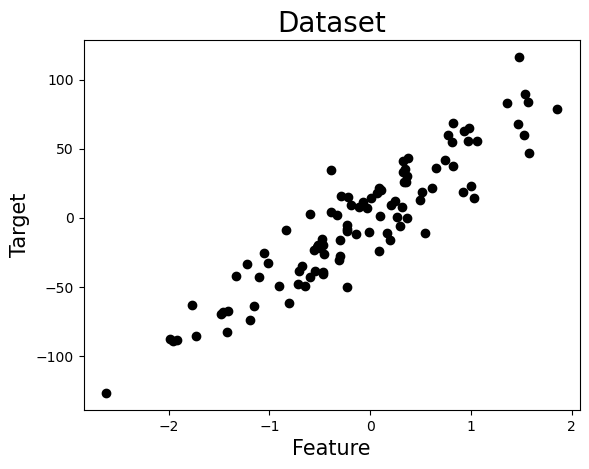

In [3]:
fig, ax = plt.subplots()
plt.scatter(X, y, c='k') # Plot generated data points
plt.xlabel("Feature", fontsize=15)
plt.ylabel("Target", fontsize=15)
plt.title("Dataset", fontsize=20);

In [4]:
np.random.seed(42)

# Number of outliers
N_OUTLIERS = 10

# Calculate the mean and standard deviation of y
mean = np.mean(y)
std = np.std(y)

# Select 10 points and modify their standard deviation to be 3 units away from the mean
outlier_indices = np.random.choice(range(N_SAMPLES), size=N_OUTLIERS, replace=False)
y[outlier_indices[:5]] += 3 * std
y[outlier_indices[5:]] -= 3 * std

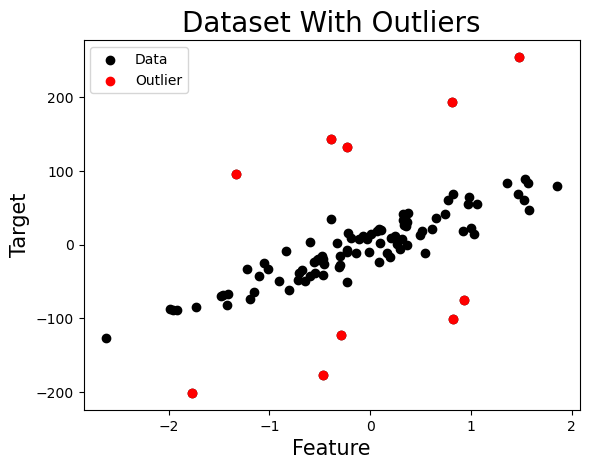

In [5]:
fix, ax = plt.subplots()
plt.scatter(X, y, c="k", label="Data") # Plot the data points as a scatter plot
plt.scatter(X[outlier_indices], y[outlier_indices], c="r", label="Outlier") # Plot the outliers as red points
plt.xlabel("Feature", fontsize=15)
plt.ylabel("Target", fontsize=15)
plt.title("Dataset With Outliers", fontsize=20)
plt.legend() # Add a legend to the plot

# 1. Detect Outliers
## 1.1. Univariate Methods
### a. Kernel Density Estimate

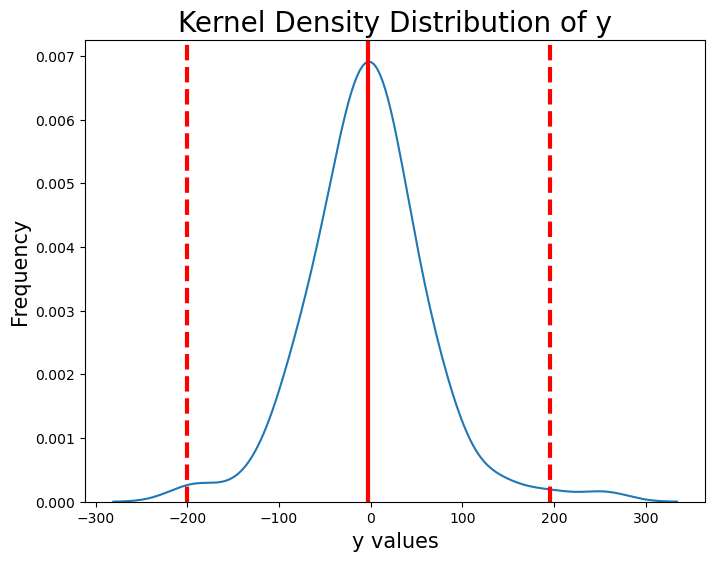

In [6]:
import seaborn as sns
import numpy as np

# Set the size of the plot
plt.figure(figsize=(8, 6))

# Plot the kernel density estimate of y
sns.kdeplot(y)


# Calculate the mean and standard deviation of y
mean = np.mean(y)
std = np.std(y)

# Draw vertical lines at the mean and three standard deviations from the mean
plt.axvline(mean, color='red', linewidth=3)
plt.axvline(mean + 3*std, color='red', linewidth=3, linestyle='dashed')
plt.axvline(mean - 3*std, color='red', linewidth=3, linestyle='dashed')

# Add labels and title
plt.xlabel('y values', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title('Kernel Density Distribution of y', fontsize=20)

# Show plot
plt.show()


In this plot, we used a kernel density estimate to visualize the distribution of the variable y. We marked the mean and three standard deviations from it with vertical lines. Upon examining the distribution, we noticed that there is slight skewness present in both tails of the distribution and that some data points lie significantly outside the range of three standard deviation units from the mean. These data points may be considered outliers and require further investigation.

### b. Box Plot

Text(0.5, 1.0, 'Distribution of The Target')

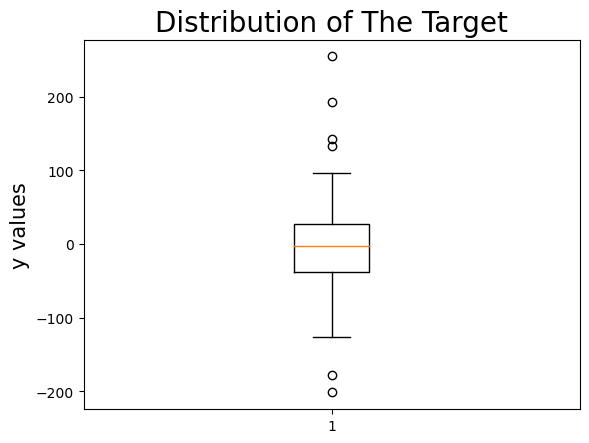

In [7]:
plt.boxplot(y, whis=1.5)
plt.ylabel('y values', fontsize=15)
plt.title('Distribution of The Target', fontsize=20)

Here, we can see that there's 6 outliers detected out of 10.

### c. Interquartile Range

In [8]:
def detect_outliers_IQR(data):
    # Calculate the first and third quartiles
    Q1, Q3 = np.percentile(data, [25, 75])
    
    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1
    
    # Set the lower and upper bounds for the outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Initialize a list to store the indices of the outliers
    outliers = []
    
    # Iterate through the data and add the index to the list of outliers
    # if the value is outside the bounds
    for i, value in enumerate(data):
        if value < lower_bound or value > upper_bound:
            # Check if the index has already been added to the list of outliers
            if i not in outliers:
                outliers.append(i)
    
    # Return the list of outlier indices
    return outliers

# Should return the index of the outlier
outliers = detect_outliers_IQR(y)
outlier_indices.sort()
print(f"Outlier indices added to the original data set {outlier_indices}\nIndex of detected outliers {outliers}")  

Outlier indices added to the original data set [ 0 10 22 39 44 45 53 70 80 83]
Index of detected outliers [22, 44, 45, 53, 70, 80]


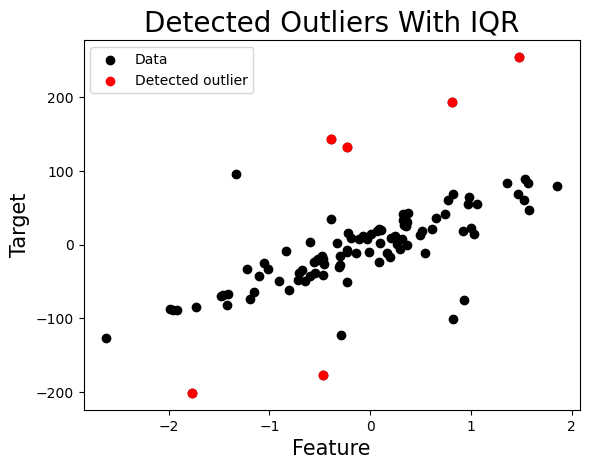

In [9]:
fix, ax = plt.subplots()
plt.scatter(X, y, c="k", label="Data") # Plot the data points as a scatter plot
plt.scatter(X[outliers], y[outliers], c="r", label="Detected outlier") # Plot the outliers as red points
plt.xlabel("Feature", fontsize=15)
plt.ylabel("Target", fontsize=15)
plt.title("Detected Outliers With IQR", fontsize=20)
plt.legend() # Add a legend to the plot
plt.show()

From the plot above we can determine that only 6 outliers were detected out one 10 using IQR method.

### d. Z-scores

In [10]:
def detect_outliers_z_scores(data):
    # Set the threshold for what is considered an outlier
    threshold = 3
    
    # Calculate the mean and standard deviation of the data
    mean = np.mean(data)
    std = np.std(data)
    
    # Calculate the z-scores for each element in the data
    z_scores = [(x - mean) / std for x in data]
    
    # Initialize a list to store the indices of the outliers
    outliers = []
    
    # Iterate through the z-scores and add the index to the list of outliers
    # if the absolute value of the z-score is greater than the threshold
    for i, z_score in enumerate(z_scores):
        # A z-score of 3 or -3 corresponds to a data point that is 3 standard deviations away from the mean,
        # and these points are considered outliers
        if np.abs(z_score) > threshold:
            # Check if the index has already been added to the list of outliers
            if i not in outliers:
                outliers.append(i)
    
    # Return the list of outlier indices
    return outliers

# should return the index of the outlier
outliers = detect_outliers_z_scores(y)
print(f"Outlier indices added to the original data set {outlier_indices}\nIndex of detected outliers {outliers}")

Outlier indices added to the original data set [ 0 10 22 39 44 45 53 70 80 83]
Index of detected outliers [53, 80]


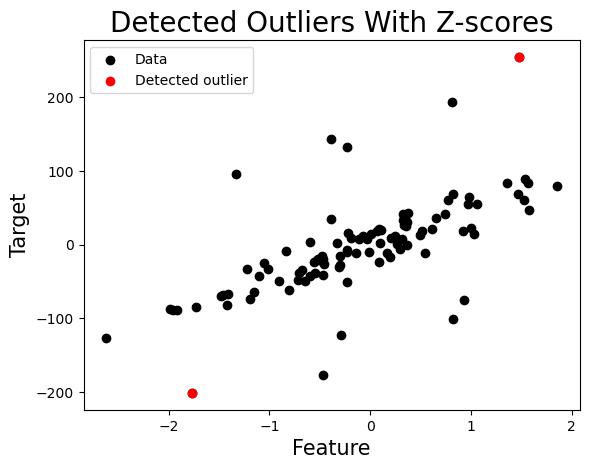

In [11]:
fix, ax = plt.subplots()
plt.scatter(X, y, c="k", label="Data") # Plot the data points as a scatter plot
plt.scatter(X[outliers], y[outliers], c="r", label="Detected outlier") # Plot the outliers as red points
plt.xlabel("Feature", fontsize=15)
plt.ylabel("Target", fontsize=15)
plt.title("Detected Outliers With Z-scores", fontsize=20)
plt.legend() # Add a legend to the plot
plt.show()

Using the Z-scores method, only **two outliers** were identifiyed.

Z-scores are based on the normal distribution, which assumes that the data are symmetric and follow a bell-shaped curve. \
Because it is based on the mean and standard deviation, the z-scores method is sensitive to outliers.

On the other hand, IQR method is less sensitive to outliers, because it only takes into account the middle 50% of the data and excludes the values at the extremes.

## 1.2. Multivariate Methods
### a. Scatter Plot

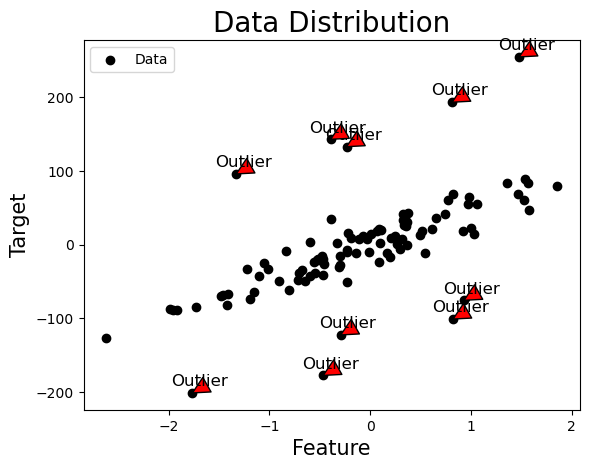

In [12]:
fix, ax = plt.subplots()
plt.scatter(X, y, c="k", label="Data") # Plot the data points as a scatter plot
# Anotate outliers
# Loop over the outlier indices
for index in outlier_indices:
    # Add an annotation at the outlier data point
    ax.annotate('Outlier', (X[index], y[index]),
                xytext=(5,5),
                textcoords='offset points',
                fontsize=12,
                ha='center',
                arrowprops={'facecolor':'red'})
plt.xlabel("Feature", fontsize=15)
plt.ylabel("Target", fontsize=15)
plt.title("Data Distribution", fontsize=20)
plt.legend() # Add a legend to the plot
plt.show()

### b. Residual Analysis

In [13]:
from sklearn.linear_model import LinearRegression

# Create a linear regression model
model = LinearRegression()
model.fit(X, y)

LinearRegression()

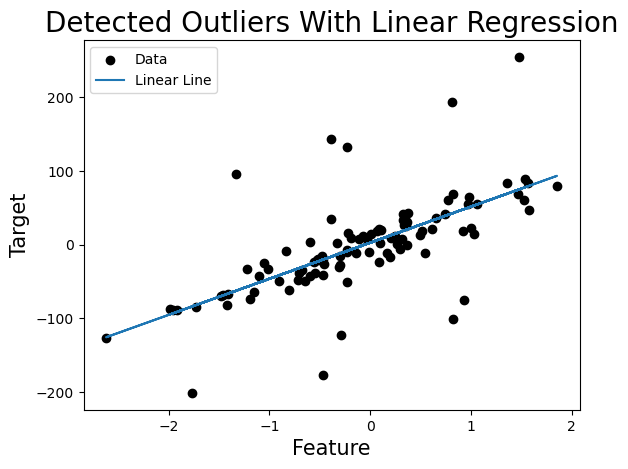

In [14]:
fix, ax = plt.subplots()
plt.scatter(X, y, c="k", label="Data") # Plot the data points as a scatter plot
plt.plot(X, model.predict(X), label="Linear Line") # Plot the estimated linear line that best fit the data
plt.xlabel("Feature", fontsize=15)
plt.ylabel("Target", fontsize=15)
plt.title("Detected Outliers With Linear Regression", fontsize=20)
plt.legend() # Add a legend to the plot
plt.show()

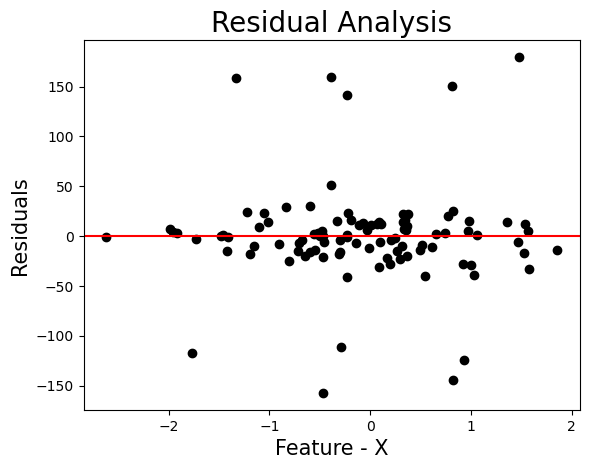

In [15]:
# Calculate the residuals
residuals = y - model.predict(X)

# Plot the residuals
plt.scatter(X, residuals, c='k')
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Feature - X', fontsize=15)
plt.ylabel('Residuals', fontsize=15)
plt.title("Residual Analysis", fontsize=20)
plt.show()

### c. Cook's Distance

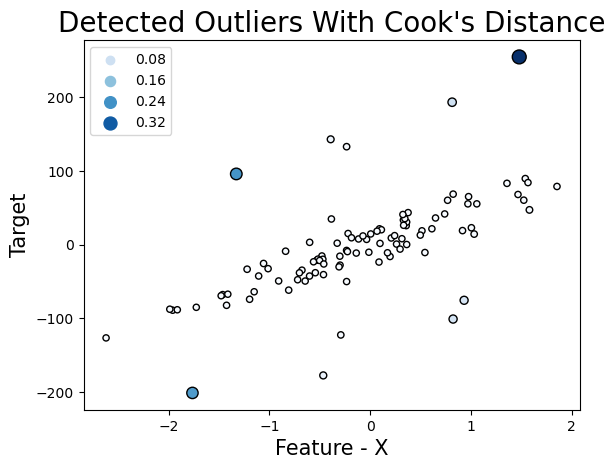

In [16]:
import statsmodels.api as sm

# Create an instance of the OLS class
model = sm.OLS(y, X)

# Fit the model to the data
results = model.fit()

# Get the influence object
influence = results.get_influence()

# Calculate Cook's distance
cooks_distance = influence.cooks_distance[0]

# Find the index of the data point with the highest Cook's distance
max_cooks_distance = np.argmax(cooks_distance)

# Scatter plot of the data
import seaborn as sns

sns.scatterplot(x=X.squeeze(), y=y, hue=cooks_distance, size=cooks_distance, sizes=(20, 100), edgecolor='black', linewidth=1, palette='Blues')
plt.xlabel('Feature - X', fontsize=15)
plt.ylabel('Target', fontsize=15)
plt.title("Detected Outliers With Cook's Distance", fontsize=20)
plt.show()

As shown above, there’re 4 observations present a high cook’s distance with respect to the rest of the data (higher Cook’s distance means the observation has an important influence).

There are a few different ways to determine the cutoff value for Cook's distance in order to concider an observation to be influential or not. One common approach is is to use the rule of thumb that observations with Cook's distance greater than 4/n are considered influential, where n is the number of observations. It is a common rule of thumb but it should be used with caution and be verified by the domain expert.

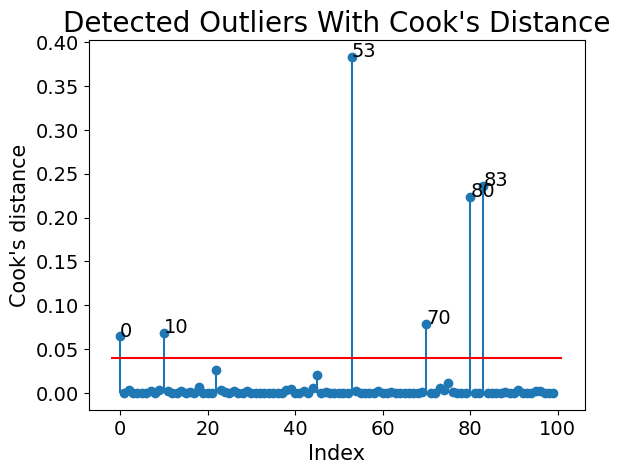

In [17]:
# Define threshold value
threshold = 4/N_SAMPLES

# Create stem plot
plt.stem(cooks_distance, basefmt=" ")

# Draw horizontal line at threshold value
plt.hlines(threshold, -2, 101, 'r')

# Initialize empty lists to store the index and value of influential data
index_id, influencial_data = [], []

# Iterate through the Cook's distance values
for i in range(len(cooks_distance)):
    # Check if the Cook's distance value is above the threshold
    if cooks_distance[i] > threshold:
        # If yes, append the index and value to the respective lists
        index_id.append(i)
        influencial_data.append(cooks_distance[i])

# Iterate through the influential data
for index, value in zip(index_id, influencial_data):
    # Add text labels with the index of the observation on the plot
    plt.text(index, value, str(index), fontsize=14)

# Customize the appearance of the x and y-axis tick labels
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Add labels and title to the plot
plt.xlabel('Index', fontsize=15)
plt.ylabel('Cook\'s distance', fontsize=15)
plt.title('Detected Outliers With Cook\'s Distance', fontsize=20)
plt.show()

The following stem plot, shows that 6 observations have a Cook's distances higher than the threshold. 

In [18]:
print(f"Outlier indices added to the original data set {outlier_indices}\nIndex of detected outliers {index_id}")  

Outlier indices added to the original data set [ 0 10 22 39 44 45 53 70 80 83]
Index of detected outliers [0, 10, 53, 70, 80, 83]


References

https://developer.nvidia.com/blog/dealing-with-outliers-using-three-robust-linear-regression-models/

https://medium.com/swlh/identify-outliers-with-pandas-statsmodels-and-seaborn-2766103bf67c

https://easystats.github.io/performance/reference/check_outliers.html#value

https://www.knime.com/blog/four-techniques-for-outlier-detection

https://www.qualtrics.com/support/stats-iq/analyses/regression-guides/interpreting-residual-plots-improve-regression/

https://statisticsbyjim.com/basics/outliers/

https://statisticsbyjim.com/regression/check-residual-plots-regression-analysis/